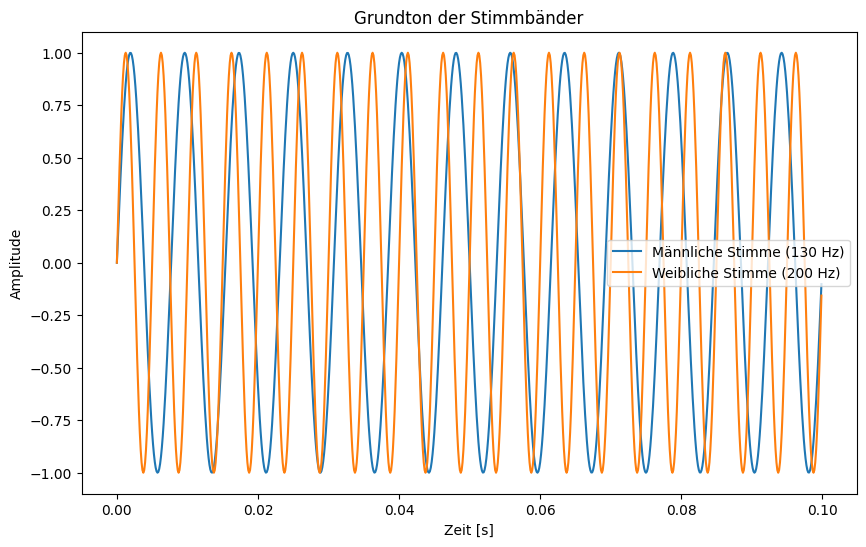

Spielen des männlichen Grundtons (130 Hz)...
Spielen des weiblichen Grundtons (200 Hz)...


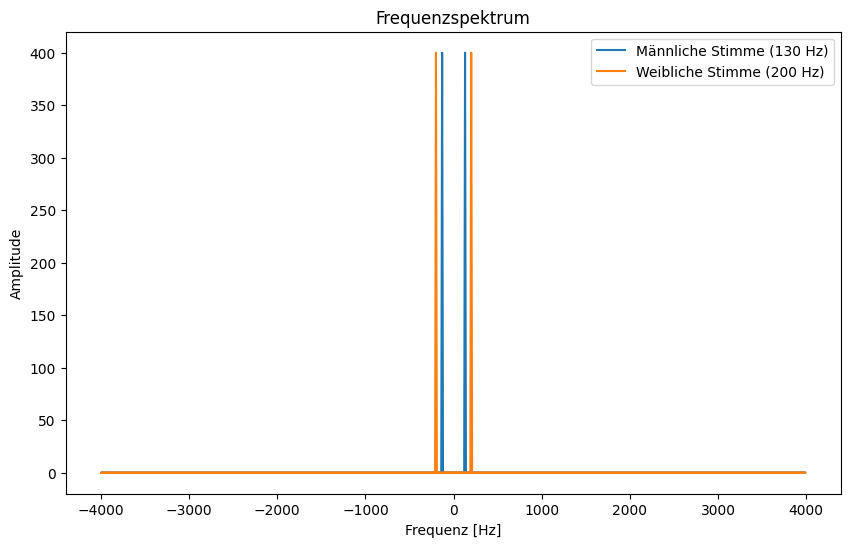

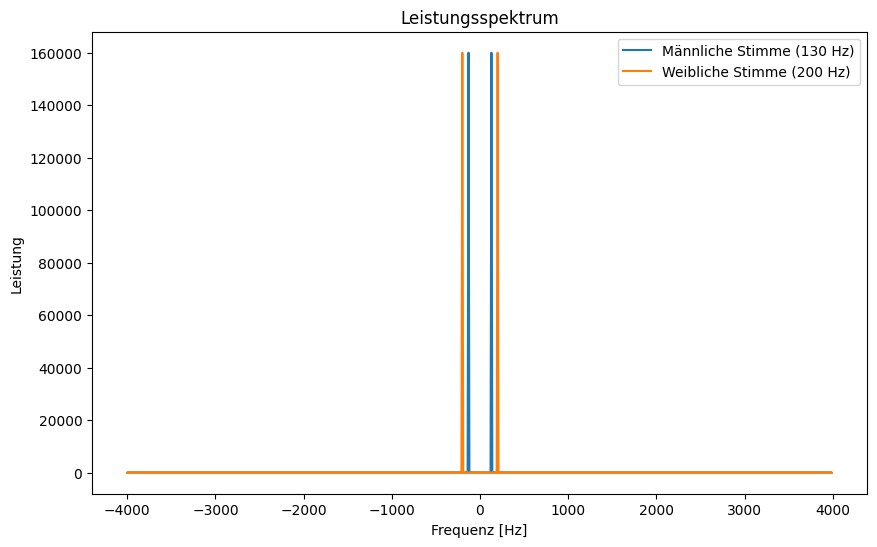

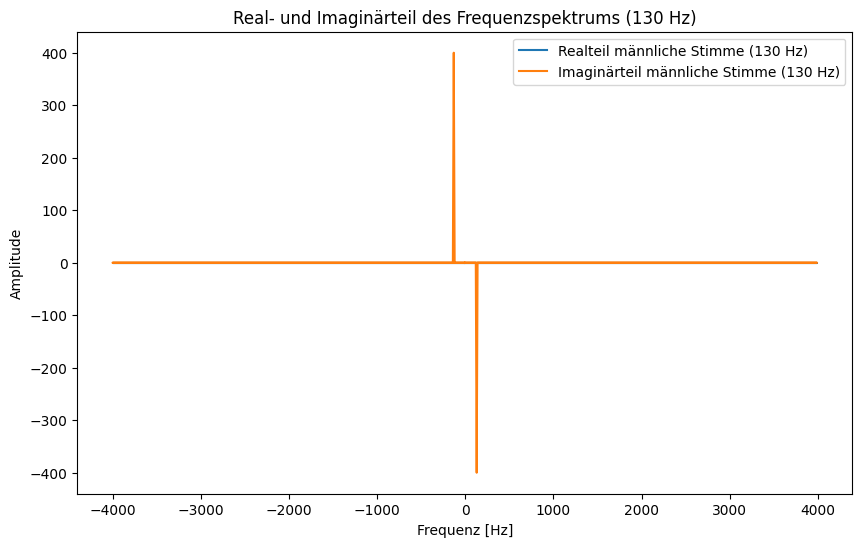

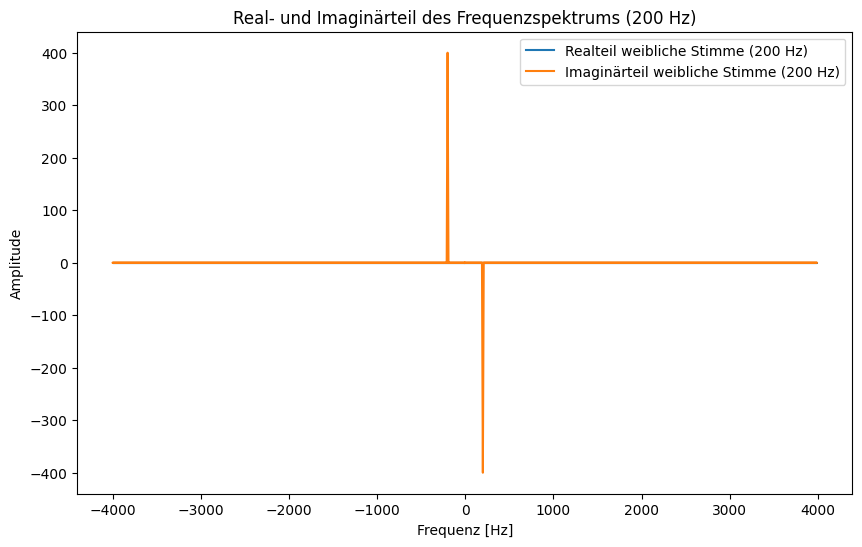

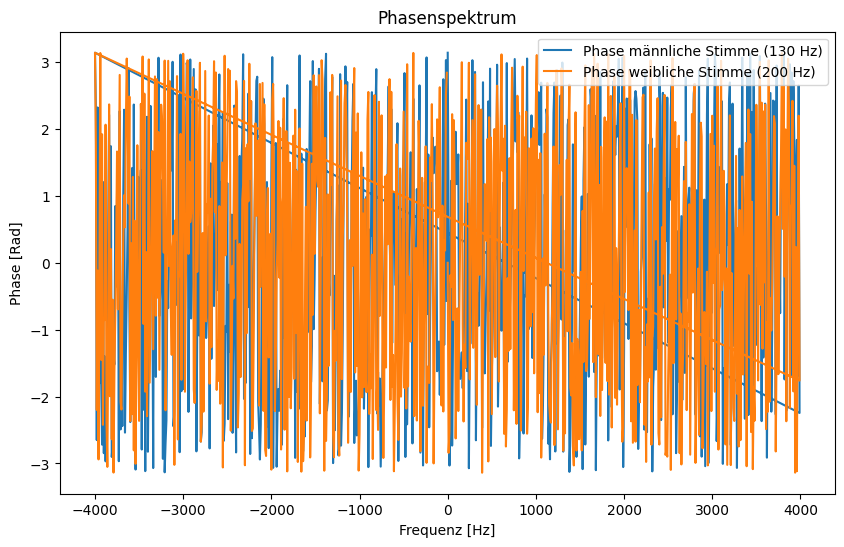

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Parameter
f_male = 130  # Grundfrequenz der männlichen Stimme in Hz
f_female = 200  # Grundfrequenz der weiblichen Stimme in Hz
A = 1.0  # Amplitude
t = 0.1  # Dauer in Sekunden
fs = 8000  # Abtastfrequenz in Hz

# Zeitvektor
time = np.linspace(0, t, int(fs*t), endpoint=False)

# Grundton generieren
y_male = A * np.sin(2 * np.pi * f_male * time)
y_female = A * np.sin(2 * np.pi * f_female * time)

# Plotten
plt.figure(figsize=(10, 6))
plt.plot(time, y_male, label='Männliche Stimme (130 Hz)')
plt.plot(time, y_female, label='Weibliche Stimme (200 Hz)')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Grundton der Stimmbänder')
plt.show()

# Abspielen
print("Spielen des männlichen Grundtons (130 Hz)...")
sd.play(y_male, fs)
sd.wait()

print("Spielen des weiblichen Grundtons (200 Hz)...")
sd.play(y_female, fs)
sd.wait()



# Frequenzspektrum berechnen
Y_male = np.fft.fft(y_male)
Y_female = np.fft.fft(y_female)
freqs = np.fft.fftfreq(len(time), 1/fs)

# Plotten des Spektrums
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(Y_male), label='Männliche Stimme (130 Hz)')
plt.plot(freqs, np.abs(Y_female), label='Weibliche Stimme (200 Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Frequenzspektrum')
plt.show()

# Betragsquadrat plotten
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.abs(Y_male)**2, label='Männliche Stimme (130 Hz)')
plt.plot(freqs, np.abs(Y_female)**2, label='Weibliche Stimme (200 Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung')
plt.legend()
plt.title('Leistungsspektrum')
plt.show()

# Real- und Imaginärteil plotten
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.real(Y_male), label='Realteil männliche Stimme (130 Hz)')
plt.plot(freqs, np.imag(Y_male), label='Imaginärteil männliche Stimme (130 Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Real- und Imaginärteil des Frequenzspektrums (130 Hz)')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(freqs, np.real(Y_female), label='Realteil weibliche Stimme (200 Hz)')
plt.plot(freqs, np.imag(Y_female), label='Imaginärteil weibliche Stimme (200 Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Real- und Imaginärteil des Frequenzspektrums (200 Hz)')
plt.show()

# Phasenspektrum plotten
plt.figure(figsize=(10, 6))
plt.plot(freqs, np.angle(Y_male), label='Phase männliche Stimme (130 Hz)')
plt.plot(freqs, np.angle(Y_female), label='Phase weibliche Stimme (200 Hz)')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')
plt.legend()
plt.title('Phasenspektrum')
plt.show()

Amplitudenspektrum: Betrag der Fourier-Transformierten, zeigt die Stärke der Frequenzkomponenten.
Phasenspektrum: Argument der Fourier-Transformierten, zeigt die Phasenverschiebung der Frequenzkomponenten.

Das Frequenzspektrum |Y(f)| ist die Fouriertransformation sie zeigt an, welche Frequenzen sich in dem Ursprungs signal mit welcher Amplitude befinden. |Y(f)|^2 hingegen ist das Leistungsspektrum, dieses Zeigt wie die Energie des Signals auf die einzelnen Frequenzen verteilt ist. |Y(f)|^2 kann auch in db angegeben werden. Beide haben jedoch den selben Informationsgehalt der Unterschied liegt primär in der besseren Sichtbarkeit der Unterschied bei dem Betragsquadrat.

In [3]:
# Mittlere Leistung in der Frequenzdomäne
P_male_freq = np.sum(np.abs(Y_male)**2) / len(Y_male)
P_female_freq = np.sum(np.abs(Y_female)**2) / len(Y_female)
print(f"Mittlere Leistung der männlichen Stimme in der Frequenzdomäne: {P_male_freq}")
print(f"Mittlere Leistung der weiblichen Stimme in der Frequenzdomäne: {P_female_freq}")

print("------------------------------------------------------------------------------------")

# Mittlere Leistung in der Zeitdomäne
P_male_time = np.mean(y_male**2)
P_female_time = np.mean(y_female**2)
print(f"Mittlere Leistung der männlichen Stimme in der Zeitdomäne: {P_male_time}")
print(f"Mittlere Leistung der weiblichen Stimme in der Zeitdomäne: {P_female_time}")

Mittlere Leistung der männlichen Stimme in der Frequenzdomäne: 400.00000000000017
Mittlere Leistung der weiblichen Stimme in der Frequenzdomäne: 400.0
------------------------------------------------------------------------------------
Mittlere Leistung der männlichen Stimme in der Zeitdomäne: 0.5000000000000001
Mittlere Leistung der weiblichen Stimme in der Zeitdomäne: 0.49999999999999983


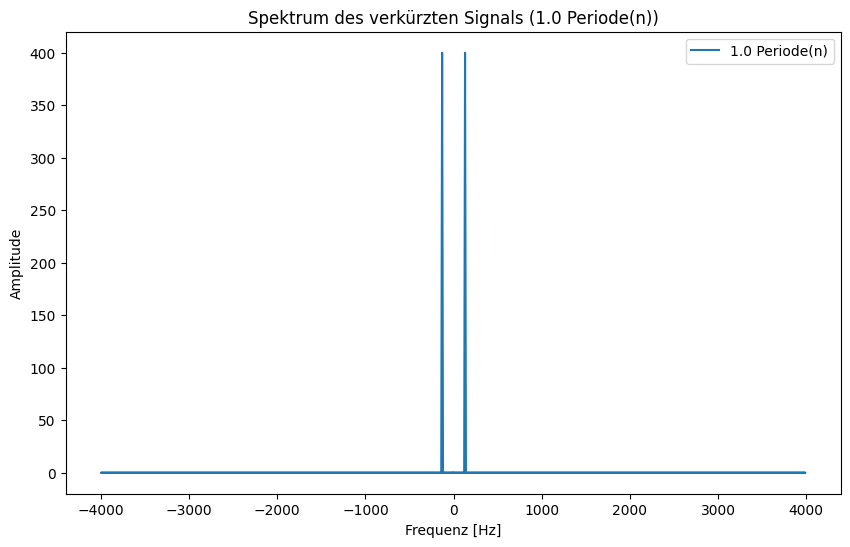

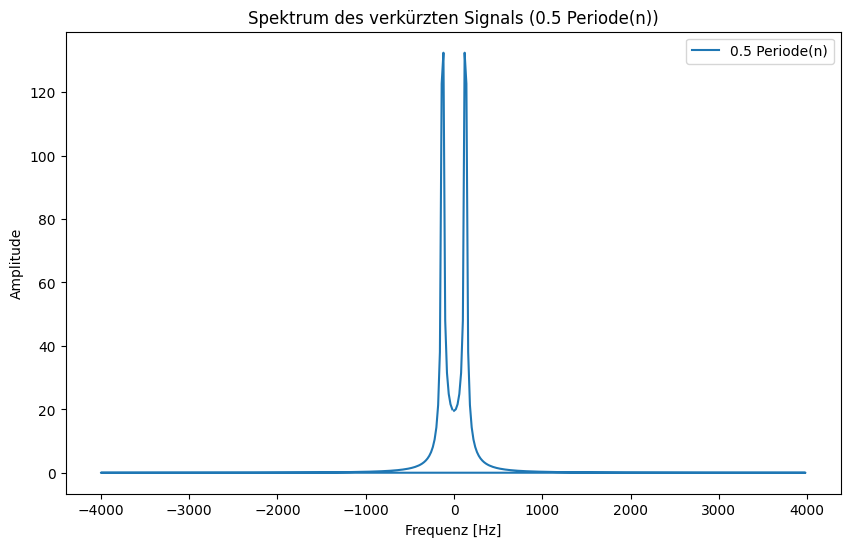

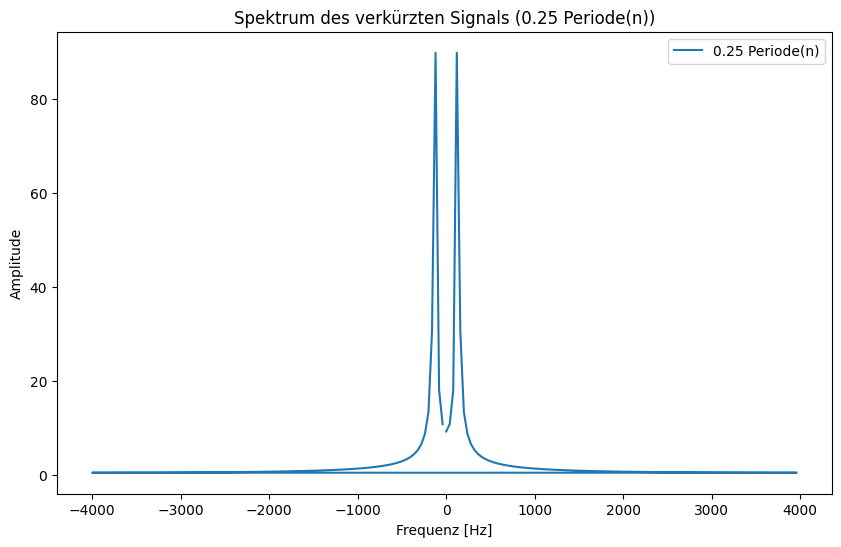

In [4]:
#Aufgabe B
# Funktion zur Verkürzung des Signals und Beobachtung des Spektrums
def shorten_and_analyze(signal, fs, periods):
    new_length = int(len(signal) / periods)
    shortened_signal = signal[:new_length]
    
    # Spektrum berechnen
    Y_shortened = np.fft.fft(shortened_signal)
    freqs_shortened = np.fft.fftfreq(len(shortened_signal), 1/fs)
    
    # Plotten
    plt.figure(figsize=(10, 6))
    plt.plot(freqs_shortened, np.abs(Y_shortened), label=f'{1/periods} Periode(n)')
    plt.xlabel('Frequenz [Hz]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title(f'Spektrum des verkürzten Signals ({1/periods} Periode(n))')
    plt.show()

# Verkürzungen durchführen
shorten_and_analyze(y_male, fs, 1)
shorten_and_analyze(y_male, fs, 2)
shorten_and_analyze(y_male, fs, 4)


Das Kürzen eines Signals im Zeitbereich führt zu einer Faltung seines Spektrums mit einer Sinc-Funktion, was das Spektrum verbreitert. Das bedeutet, dass die Energie auf benachbarte Frequenzen verteilt wird, wodurch das ursprüngliche Spektrum unschärfer wird.

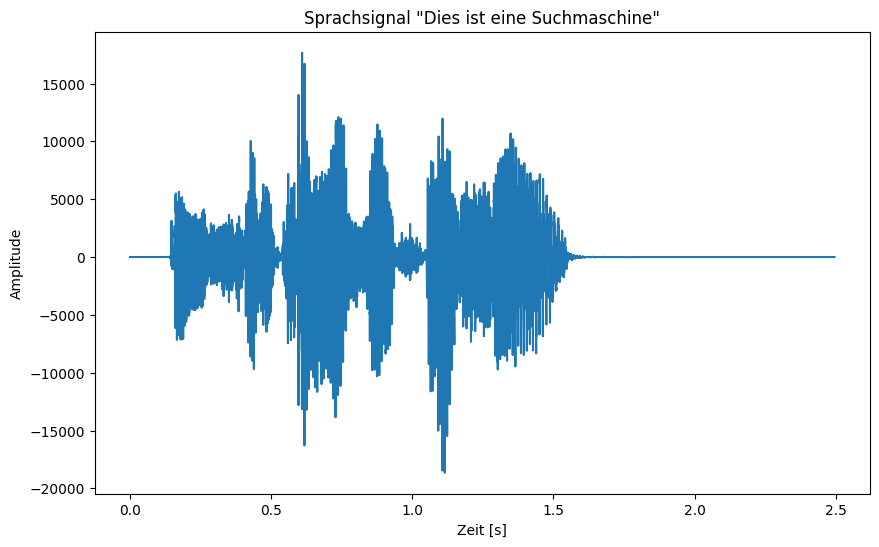

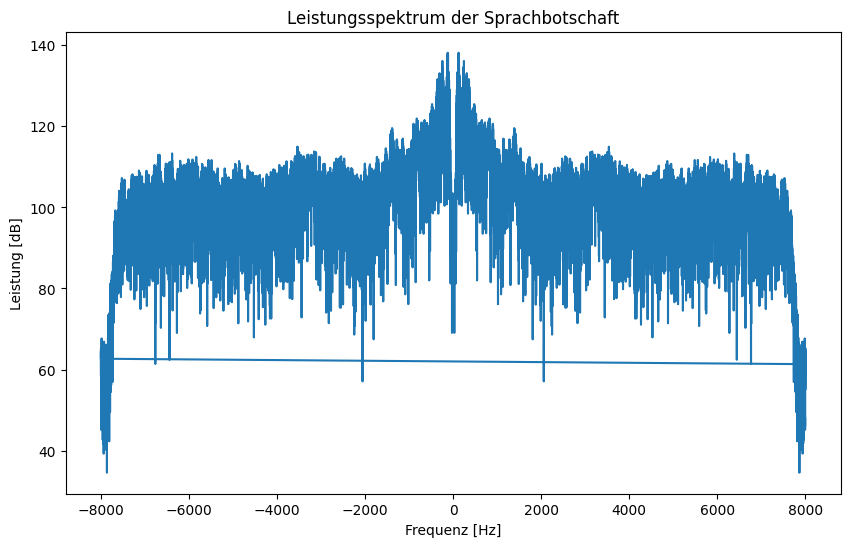

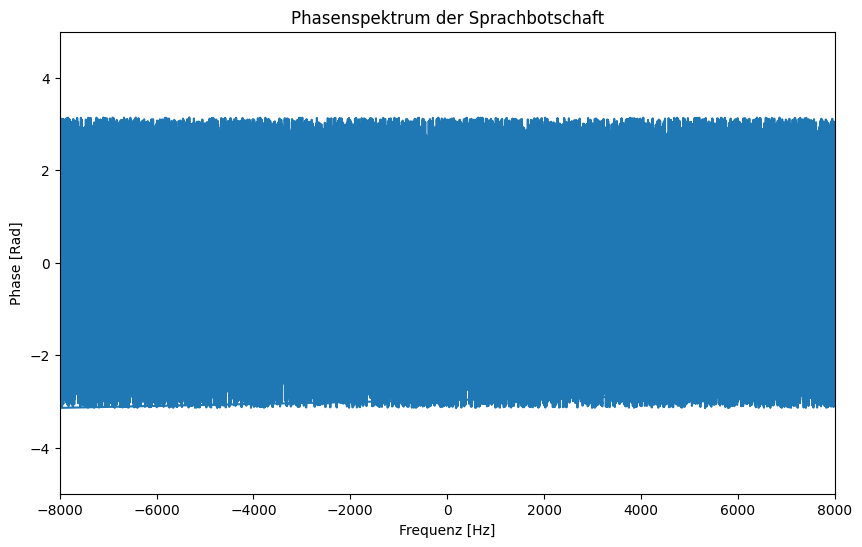

In [19]:
#Aufgabe C
import scipy.io.wavfile as wav

# Sprachbotschaft laden und analysieren
fs, speech_signal = wav.read('speech_message.wav')

# Signalverlauf plotten
time_speech = np.linspace(0, len(speech_signal) / fs, num=len(speech_signal))

plt.figure(figsize=(10, 6))
plt.plot(time_speech, speech_signal)
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.title('Sprachsignal "Dies ist eine Suchmaschine"')
plt.show()

# Leistungsspektrum berechnen
speech_spectrum = np.fft.fft(speech_signal)
freqs_speech = np.fft.fftfreq(len(speech_signal), 1/fs)

# Leistungsspektrum in dB plotten
plt.figure(figsize=(10, 6))
plt.plot(freqs_speech, 20 * np.log10(np.abs(speech_spectrum)))
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung [dB]')
plt.title('Leistungsspektrum der Sprachbotschaft')
plt.show()

# Phase plotten
plt.figure(figsize=(10, 6))
plt.plot(freqs_speech, np.angle(speech_spectrum))
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Phase [Rad]')
plt.title('Phasenspektrum der Sprachbotschaft')
plt.xlim([-fs/2, fs/2])  # Beispiel für Einstellung der x-Achse
plt.ylim([-5, 5])
plt.show()


Die Zeitbereich-Darstellung zeigt, wie sich das Sprachsignal im Zeitverlauf verhält, insbesondere die Änderungen der Amplitude. Die Frequenzbereich-Darstellung gibt Auskunft über die Frequenzkomponenten des Sprachsignals und deren jeweilige Leistung.

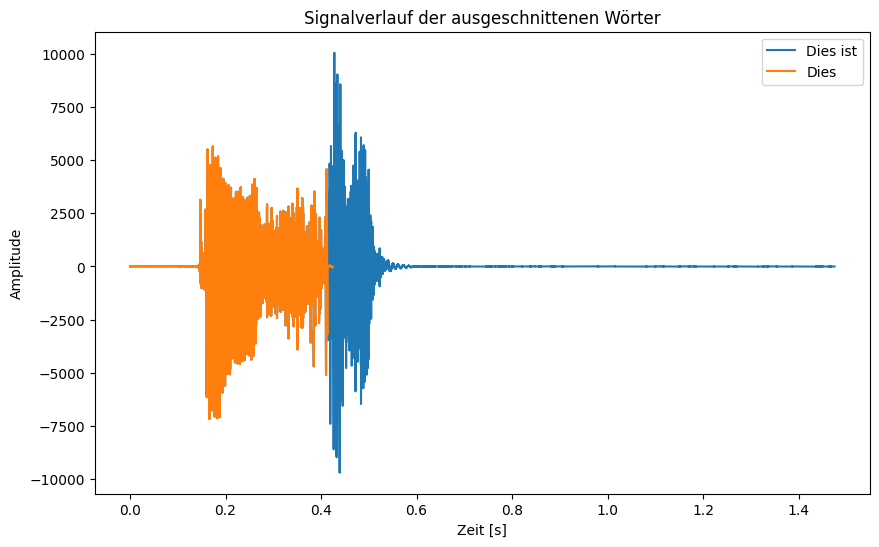

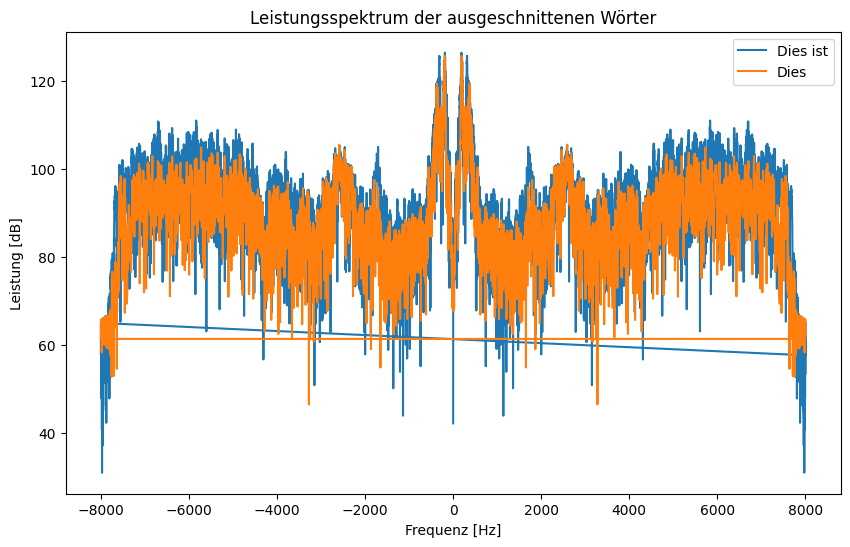

In [6]:
#Aufgabe D

fs_dies_ist, dies_ist_signal = wav.read('dies_ist.wav')
fs_dies, dies_signal = wav.read('dies.wav')

# Signalverlauf plotten
time_dies_ist = np.linspace(0, len(dies_ist_signal) / fs_dies_ist, num=len(dies_ist_signal))
time_dies = np.linspace(0, len(dies_signal) / fs_dies, num=len(dies_signal))

plt.figure(figsize=(10, 6))
plt.plot(time_dies_ist, dies_ist_signal, label='Dies ist')
plt.plot(time_dies, dies_signal, label='Dies')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Signalverlauf der ausgeschnittenen Wörter')
plt.show()

# Leistungsspektrum berechnen und plotten
dies_ist_spectrum = np.fft.fft(dies_ist_signal)
dies_spectrum = np.fft.fft(dies_signal)
freqs_dies_ist = np.fft.fftfreq(len(dies_ist_signal), 1/fs_dies_ist)
freqs_dies = np.fft.fftfreq(len(dies_signal), 1/fs_dies)

plt.figure(figsize=(10, 6))
plt.plot(freqs_dies_ist, 20 * np.log10(np.abs(dies_ist_spectrum)), label='Dies ist')
plt.plot(freqs_dies, 20 * np.log10(np.abs(dies_spectrum)), label='Dies')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Leistung [dB]')
plt.legend()
plt.title('Leistungsspektrum der ausgeschnittenen Wörter')
plt.show()


/var/folders/mz/637krld16bz691x14c_0y8800000gn/T/ipykernel_48800/514080560.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_S, signal_S = wavfile.read('S.wav')


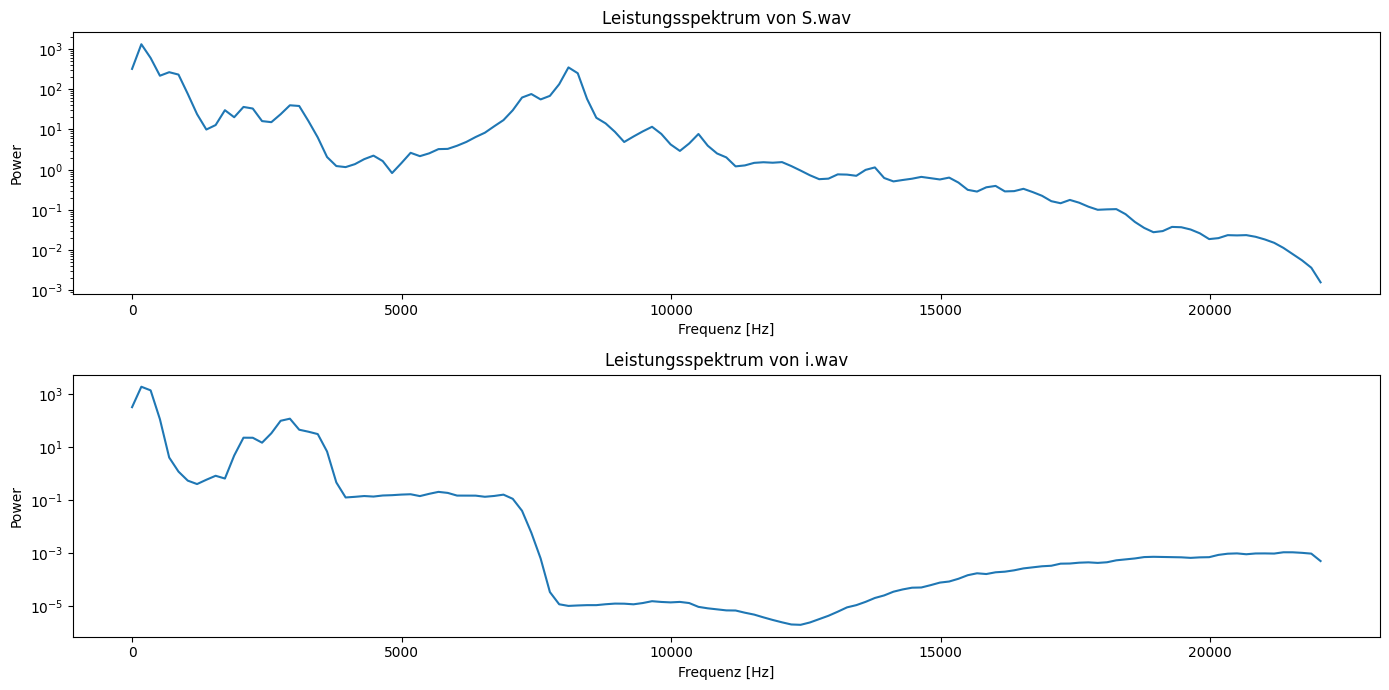

In [39]:
from scipy.signal import welch
from scipy.io import wavfile

fs_S, signal_S = wavfile.read('S.wav')
fs_i, signal_i = wavfile.read('i.wav')

assert fs_S == fs_i, "Sample raten stimmen nicht überein."

frequencies_S, power_spectrum_S = welch(signal_S, fs_S)
frequencies_i, power_spectrum_i = welch(signal_i, fs_i)

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.semilogy(frequencies_S, power_spectrum_S)
plt.title('Leistungsspektrum von S.wav')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Power')

plt.subplot(2, 1, 2)
plt.semilogy(frequencies_i, power_spectrum_i)
plt.title('Leistungsspektrum von i.wav')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Power')

plt.tight_layout()
plt.show()

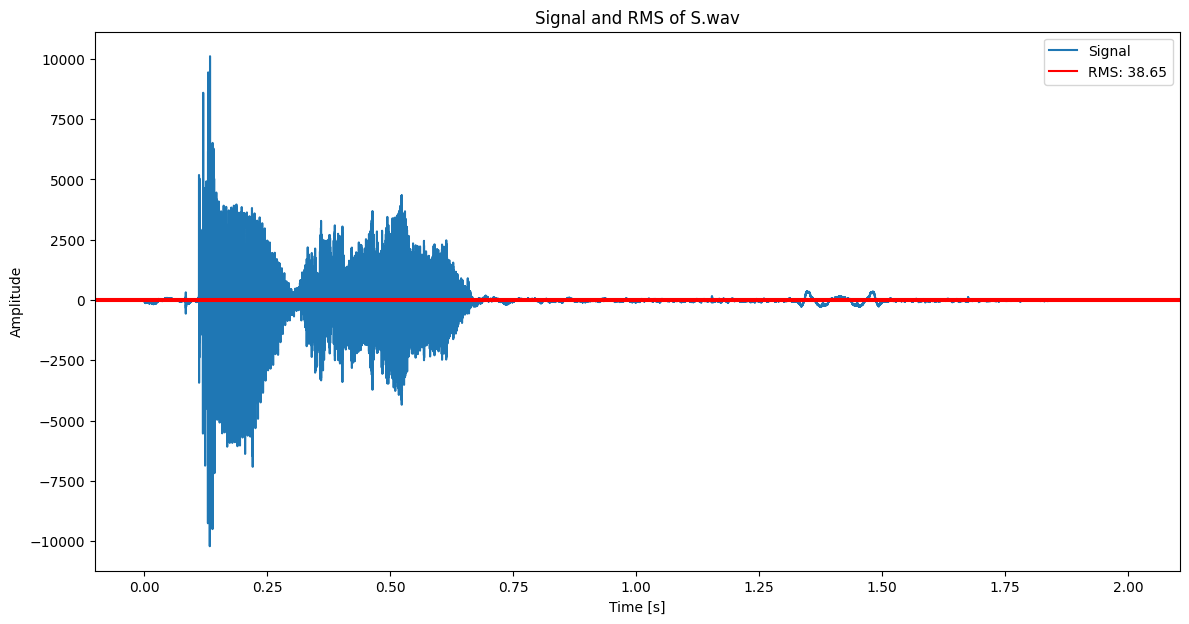

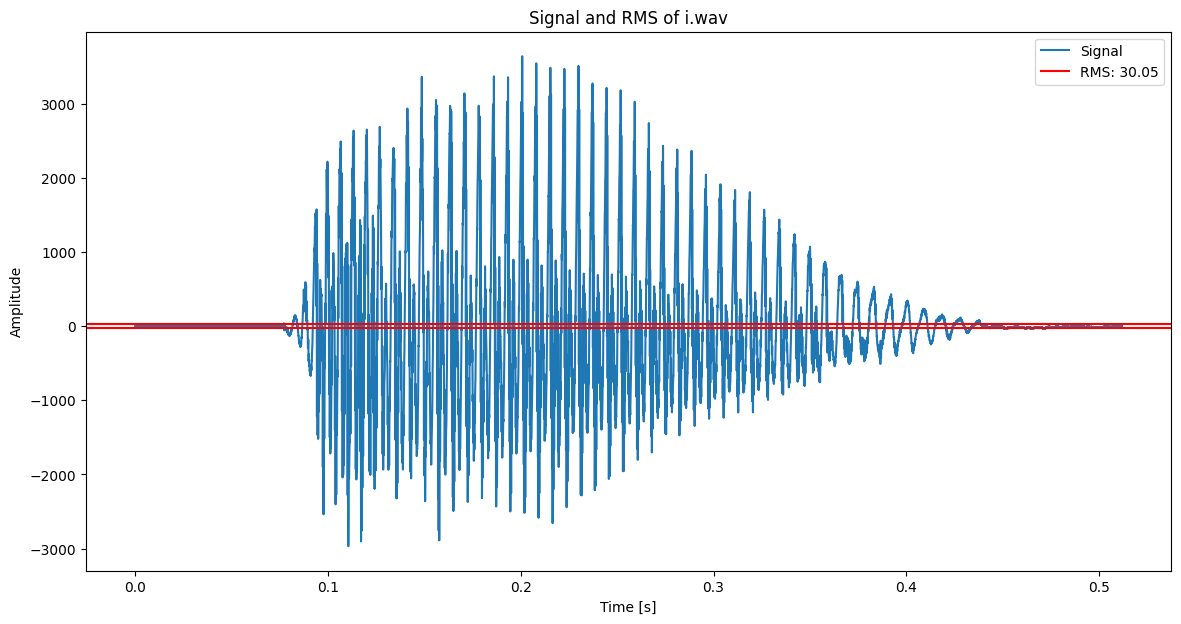

In [36]:
def plot_signal_and_rms(signal, fs, title):
    # Calculate RMS
    rms = np.sqrt(np.mean(signal**2))
    
    # Time axis for the signal
    time_axis = np.linspace(0, len(signal) / fs, num=len(signal))
    
    # Plot the signal
    plt.figure(figsize=(14, 7))
    plt.plot(time_axis, signal, label='Signal')
    plt.axhline(y=rms, color='r', linestyle='-', label=f'RMS: {rms:.2f}')
    plt.axhline(y=-rms, color='r', linestyle='-')
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Plot the signal and RMS for S.wav
plot_signal_and_rms(signal_S, fs_S, 'Signal and RMS of S.wav')

# Plot the signal and RMS for i.wav
plot_signal_and_rms(signal_i, fs_i, 'Signal and RMS of i.wav')


Dadurch, dass der rms bei S höher is kann man sehen, dass diese Datei durchschnittlich lauter ist als die von dem Vokal I. Darüber hinaus kann man an dem niedrigen rms wert im Vergleich zur Spitzen amplitude von niedrigem Rauschen aus gehen. 

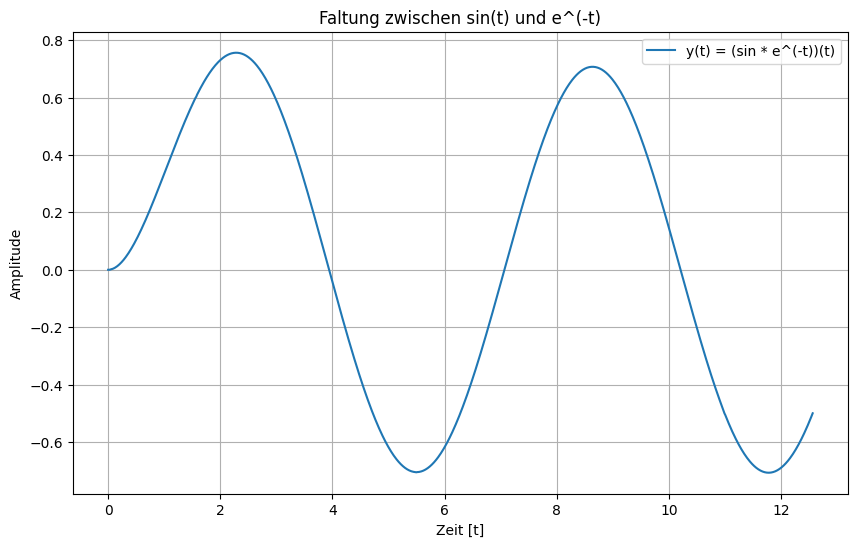

In [7]:
#Aufgabe e
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Zeitbereich
t = np.linspace(0, 4 * np.pi, 1000)

# Sinusfunktion
def x(t):
    return np.sin(t)

# Impulsantwort
def h(t):
    return np.exp(-t) * (t >= 0)

# Faltung numerisch berechnen
def y(t):
    return np.array([quad(lambda tau: x(tau) * h(t - tau), 0, 4 * np.pi)[0] for t in t])

# Zeitbereich für die Faltung
t = np.linspace(0, 4 * np.pi, 1000)
y_t = y(t)

# Plotten der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(t, y_t, label='y(t) = (sin * e^(-t))(t)')
plt.xlabel('Zeit [t]')
plt.ylabel('Amplitude')
plt.title('Faltung zwischen sin(t) und e^(-t)')
plt.legend()
plt.grid(True)
plt.show()


Die Faltung des Signals x(t)=sin(t) mit der Impulsantwort h(t)=e-t*u(t) ergibt eine geglättete Version der Sinuswelle, die aufgrund der exponentiellen Abklingrate der Impulsantwort verzögert wird. Dies zeigt, wie das System die Energie des Eingangssignals über die Zeit verteilt und abschwächt.